# Building a Decision Tree model to predict Fraud Customers

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df=pd.read_csv(r"C:\Users\aravi\OneDrive\Desktop\ExcelR Assignments\14. Decision Trees\Fraud_check.csv")

In [34]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# Creating the Target Variable based on Taxable Income 
# Good if Taxable_Income >30000 & Risky if Taxable_Income<=30000
 

In [5]:
fraud=[]
for row in df['Taxable.Income']:
    if row <=30000: fraud.append('Risky')
    elif row >30000: fraud.append('Good')         

In [6]:
fraud

['Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Risky',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Risky',
 'Good',
 'Go

In [7]:
df['fraud']=fraud

In [8]:
pd.set_option('display.max_rows', 1000)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


Good     476
Risky    124
Name: fraud, dtype: int64


<AxesSubplot:>

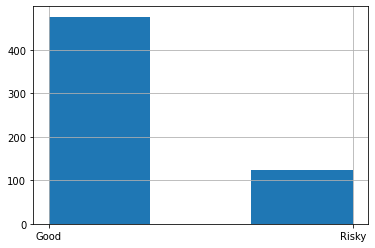

In [9]:
#Plotting Histogram for Good and Risky 
print(df['fraud'].value_counts())
df['fraud'].hist(bins=3)

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64


<AxesSubplot:>

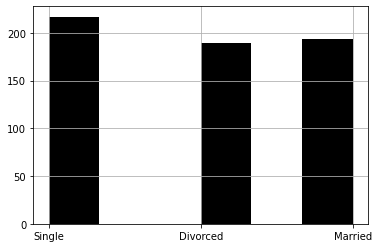

In [10]:
# Understanding the Marital Status data
print(df['Marital.Status'].value_counts())
df['Marital.Status'].hist(bins=6,color='black')

<AxesSubplot:xlabel='Taxable.Income', ylabel='Count'>

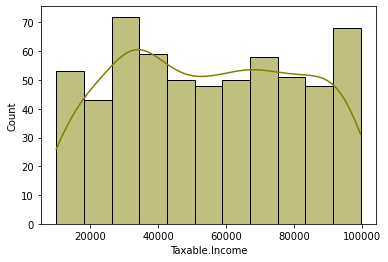

In [11]:
#Lets look at the Taxable Income Range with Histogram
sns.histplot(df['Taxable.Income'],color='olive',kde='True', bins='auto')

# Convert Categorical variables into numeric by using LanbelEncoder

In [12]:
#Convert Categorical variables into numeric by using LanbelEncoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['fraud']=label.fit_transform(df['fraud'])
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud
0,NO,Single,68833,50047,10,YES,0
1,YES,Divorced,33700,134075,18,YES,0
2,NO,Married,36925,160205,30,YES,0
3,YES,Single,50190,193264,15,YES,0
4,NO,Married,81002,27533,28,NO,0


In [13]:
cols=['Undergrad','Marital.Status','Urban']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,fraud
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


In [14]:
#Defining Dependent and Independent variables
x=df.iloc[:,0:6]
y=df.iloc[:,6]
print(y.head())
x.head()


0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int32


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


# Building Decision Tree model

In [15]:
#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=40)

In [16]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [17]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

[Text(0.5, 0.75, 'X[2] <= 29949.5\nentropy = 0.722\nsamples = 480\nvalue = [384, 96]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 96\nvalue = [0, 96]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 384\nvalue = [384, 0]')]

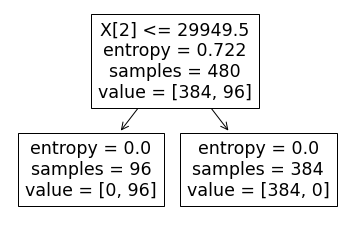

In [18]:
#Plot Tree Model
tree.plot_tree(model)

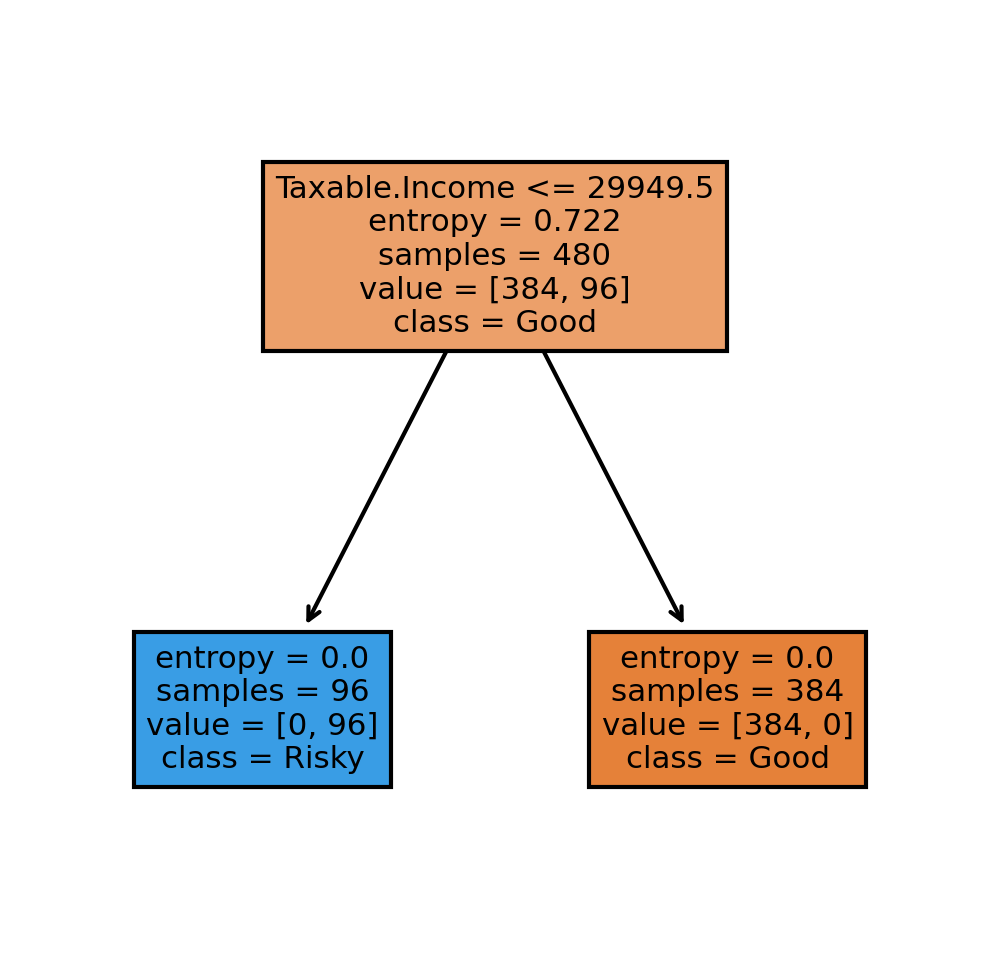

In [19]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [20]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    92
1    28
dtype: int64

In [21]:
y_test.value_counts()

0    92
1    28
Name: fraud, dtype: int64

In [22]:
# Accuracy  
print('model accuracy for testing data',np.mean(preds==y_test) )
print('model accuracy for Training Data',model.score(x_train,y_train))

model accuracy for testing data 1.0
model accuracy for Training Data 1.0


# Building Decision Tree Classifier (CART) using Gini Criteria

In [23]:
model_gini=DecisionTreeClassifier(criterion='gini', max_depth=3)

In [24]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.75, 'X[2] <= 29949.5\ngini = 0.32\nsamples = 480\nvalue = [384, 96]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 96\nvalue = [0, 96]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 384\nvalue = [384, 0]')]

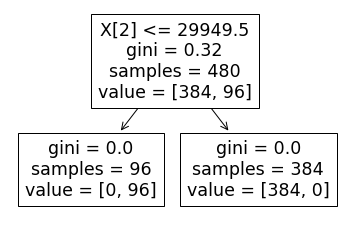

In [25]:
#Plot the Gini model
tree.plot_tree(model_gini)

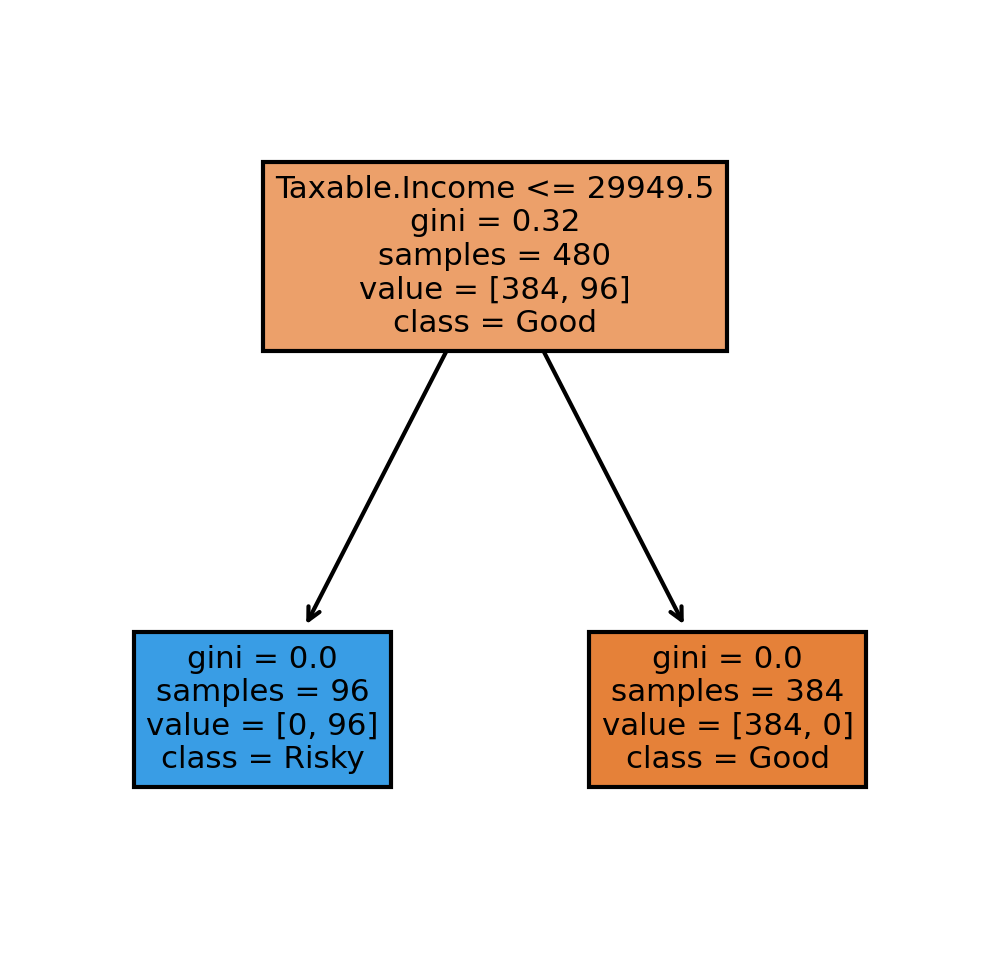

In [26]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [27]:
#predicting values for test data
pred_gini=model_gini.predict(x_test)

In [28]:
pred_gini

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [29]:
#Accuracy
np.mean(pred_gini==y_test)

1.0

In [30]:
model_gini.score(x_train,y_train)

1.0

# Building a Tree Model

In [31]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'fraud'],
      dtype='object')

|--- Taxable.Income <= 30055.50
|   |--- class: 1
|--- Taxable.Income >  30055.50
|   |--- class: 0



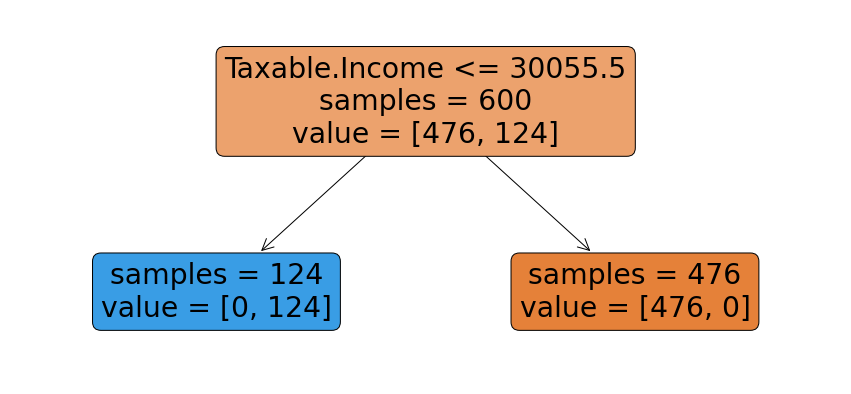

In [32]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=2)
DTree.fit(x,y)

##Plotting the trees 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'])
print(export_text(DTree, feature_names = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban']))

# Pruning the model

In [41]:
#training Tree Model
from sklearn.metrics import confusion_matrix
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 1, max_depth=2)
clf.fit(x_train,y_train)

predict1 = clf.predict(x_train)
predict2 = clf.predict(x_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Train Accuracy 1.0
Test Accuracy 1.0


In [50]:
#Training Data Confusion Matrix
cm1

array([[384,   0],
       [  0,  96]], dtype=int64)

In [51]:
#Testing Data Confusion Matrix
cm2

array([[92,  0],
       [ 0, 28]], dtype=int64)

# Conclusion: Both Entropy and Gini Decision models giving the same results with accuracy of 100 % for the given data

**Both Entropy & Gini has given the same results that are**

**The number of Good Customers are: 384**

**The number of Risky customers are: 96**